In [0]:
import numpy as np
import torch
import torchvision
import torch.nn
print(np.__version__)

1.17.4


#Machine Learning on BP Data

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

default_path="/content/gdrive/My Drive/"
os.chdir(default_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import csv

headers = ['Time','Sensor Value']
df = pd.read_csv('/content/gdrive/My Drive/BPdata/cap3.csv',names=headers)  # capacitance data
realBP = pd.read_csv('/content/gdrive/My Drive/BPdata/realBP.csv',names=headers) # BP data from our device
realBP2 = pd.read_csv('/content/gdrive/My Drive/BPdata/realBP2.csv',names=headers) # BP data from our device
realBP3 = pd.read_csv('/content/gdrive/My Drive/BPdata/realBP3.csv',names=headers) # BP data from our device
gt = pd.read_csv('/content/gdrive/My Drive/BPdata/training_data.csv',names=headers)
tf = pd.read_csv('/content/gdrive/My Drive/BPdata/training_data2.csv',names=headers)
df_train_labels = pd.read_csv('/content/gdrive/My Drive/BPdata/training_labels.csv',names=headers)  # labels that indicates various motions


df = df.loc[5500:5556]
df
gt = gt.loc[:254016]
gt
tf = tf.loc[:254016]
tf
realBP = realBP.loc[:1366]
realBP
realBP3 = realBP3.loc[:136400]
realBP3

,Time,Sensor Value
0,0,2.784461
1,1,2.767094
2,2,2.744871
3,3,2.729879
4,4,2.705887
...,...,...
136395,136395,2.783590
136396,136396,2.777229
136397,136397,2.778047
136398,136398,2.772769


## Data Preprocessing

*  Slicing blood pressure by same patterns (Mock data test)



In [0]:
import tensorflow as tf

arr = gt.values
print(len(arr))
print(arr[:56, 1])

data_new = arr[56:112, 1]
data_new2 = arr[112:168, 1]

print(data_new)
data_new = np.array(data_new * 10**12)  # magnify data to minimize gradient vanishing problem
data_new = tf.convert_to_tensor(data_new, dtype=tf.float32)
print(data_new.shape)
print(data_new2.shape)

data = arr[:56, 1]
data = np.array(data * 10**12)
data = tf.convert_to_tensor(data, dtype=tf.float32)

print(data)
print(data.shape)

train_labels = df_train_labels.values
train_labels = np.array(train_labels)
train_labels = train_labels[:, 0]

print(train_labels.shape)

254016
[2.41e-12 2.41e-12 2.4e-12 2.4e-12 2.4e-12 2.4300000000000003e-12
 2.4900000000000005e-12 2.6000000000000002e-12 2.7300000000000003e-12
 2.8499999999999998e-12 2.8499999999999998e-12 2.8199999999999997e-12
 2.77e-12 2.7099999999999996e-12 2.66e-12 2.65e-12 2.65e-12 2.66e-12
 2.66e-12 2.66e-12 2.63e-12 2.62e-12 2.62e-12 2.62e-12 2.63e-12 2.64e-12
 2.65e-12 2.65e-12 2.64e-12 2.62e-12 2.6000000000000002e-12 2.59e-12
 2.5699999999999998e-12 2.55e-12 2.54e-12 2.54e-12 2.54e-12
 2.5299999999999995e-12 2.5299999999999995e-12 2.5299999999999995e-12
 2.5299999999999995e-12 2.5299999999999995e-12 2.5299999999999995e-12
 2.52e-12 2.52e-12 2.52e-12 2.5099999999999996e-12 2.5099999999999996e-12
 2.5099999999999996e-12 2.5000000000000003e-12 2.5000000000000003e-12
 2.4900000000000005e-12 2.4900000000000005e-12 2.48e-12
 2.4700000000000006e-12 2.4700000000000006e-12]
[2.41e-12 2.41e-12 2.4e-12 2.4e-12 2.4e-12 2.4300000000000003e-12
 2.4900000000000005e-12 2.6000000000000002e-12 2.13e-12 2.45e-

In [0]:
data_len = len(arr)
print(data_len)

cycle_num = data_len/56
print(cycle_num)
train_set = []
print(cycle_num)

start_idx = 0
last_idx = 56

for i in range(int(cycle_num)):
  train_data = arr[start_idx:last_idx, 1]
  train_data = train_data * 10 ** 12
  train_set.append(train_data)
  start_idx += 56
  last_idx += 56
  
train_set = np.array(train_set)
print(train_set.shape)
print(train_set[1])

254016
4536.0
4536.0
(4536, 56)
[2.41 2.41 2.4 2.4 2.4 2.43 2.4900000000000007 2.6 2.13 2.4499999999999997
 2.35 2.22 2.37 2.11 2.2600000000000002 2.4499999999999997 2.35 2.22 2.37
 2.11 2.2600000000000002 2.92 2.72 2.4200000000000004 2.33 2.64 2.95 2.25
 2.3400000000000003 2.1199999999999997 2.5000000000000004 2.79 2.57 2.55
 2.4 2.63 2.7400000000000007 2.93 2.23 2.15 2.64 2.23 2.7300000000000004
 2.32 2.52 2.52 2.51 2.51 2.91 2.5000000000000004 2.5000000000000004
 2.4900000000000007 2.4900000000000007 2.78 2.57 2.4700000000000006]


* Plot one cycle of blood pressure data

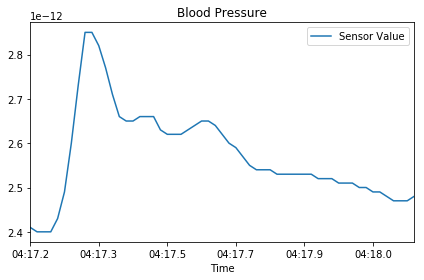

In [0]:
df.plot(x='Time',y='Sensor Value')
plt.title('Blood Pressure', color='black')
plt.tight_layout()
plt._show()

* Dense neural network for training blood pressure data 

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1824      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 3,235
Trainable params: 3,107
Non-trainable params: 128
_________________________________________________________________


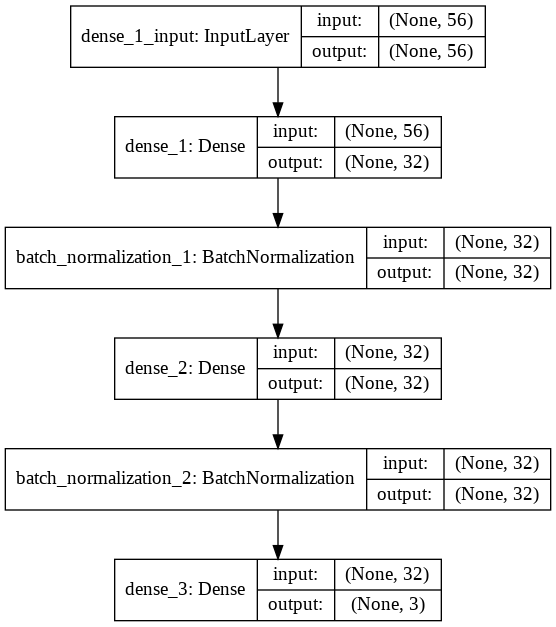

In [0]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(56,)))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization(momentum=0.9))
model.add(layers.Dense(3, activation="softmax"))

model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
import keras

print(len(train_set))
print(train_set.shape)
print(train_labels)
print(train_labels.shape)
one_hot_labels = keras.utils.to_categorical(train_labels, num_classes=3)  # three motions

x_val = train_set[:3000]  # validation set
partial_x_train = train_set[3000:]
y_val = one_hot_labels[:3000]
partial_y_train = one_hot_labels[3000:]


one_hot_labels.shape

4536
(4536, 56)
[0. 1. 2. ... 0. 1. 2.]
(4536,)


(4536, 3)

* Train the model

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1536 samples, validate on 3000 samples
Epoch 1/100
1536/1536 [==============================] - 10s 7ms/step - loss: 0.4333 - acc: 0.8438 - val_loss: 2.7223 - val_acc: 0.3333
Epoch 2/100
1536/1536 [==============================] - 0s 145us/step - loss: 0.0768 - acc: 1.0000 - val_loss: 2.8142 - val_acc: 0.3333
Epoch 3/100
1536/1536 [==============================] - 0s 155us/step - loss: 0.0209 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 1.0000
Epoch 4/100
1536/1536 [==============================] - 0s 145us/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 5/100
1536/1536 [==============================] - 0s 147us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 6/100
1536/1536 [==============================] - 0s 152us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 7/100
1536/1536 [==============

* Training loss and validation loss 

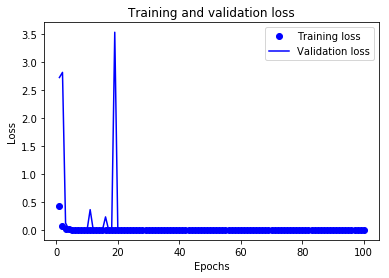

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## BP data training with various deep learning models

In [0]:
## MLP Model ##
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 1])
        dataY.append(signal_data[i + look_back, 1])
    return np.array(dataX), np.array(dataY)

look_back = 100

# make dataset 
signal_data = realBP3.values
signal_data = signal_data[0:20000, 1]
print(signal_data)
signal_data = signal_data.reshape(20000, 1)
print(signal_data.shape)
# data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)
print(signal_data)
# split the data
train = signal_data[0:10000]
val = signal_data[10000:14000]
test = signal_data[14000:20000]

# make datasets 
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

# make MLP model
model = Sequential()
model.add(Dense(32,input_dim=100,activation="relu"))
model.add(Dropout(0.3))
for i in range(3):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

# compile the model
model.compile(loss='mean_squared_error', optimizer='adagrad')

# train the model
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
          
# evaluate the model
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

# train the model
look_ahead = 1000
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])

In [0]:
print(signal_data)
print(signal_data.shape)

[[0.45159997]
 [0.43478499]
 [0.41326799]
 ...
 [0.43166717]
 [0.44620772]
 [0.44988765]]
(20000, 1)


Using TensorFlow backend.


[2.78446143 2.76709424 2.74487061 ... 2.76387402 2.77889209 2.78269287]
(20000, 1)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 9900 samples, validate on 3900 samples
Epoch 1/20
9900/9900 [==============================] - 61s 6ms/step - loss: 0.0143 - val_loss: 0.0041
Epoch 2/20
9900/9900 [==============================] - 57s 6ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 3/20
9900/9900 [==============================] - 56s 6ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/20
9900/9900 [==============================] - 55s 6ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 5/20
9900/9900 [==============================] - 55s 6ms/step - loss: 0.0018 - val_loss: 8.3752e-04
Epoch 6/20
9900/9900 [==============================] - 56s 6ms/step - loss: 0.0016 - val_loss: 7.0108e-04
Epoch 7/20
9900/9900 [======

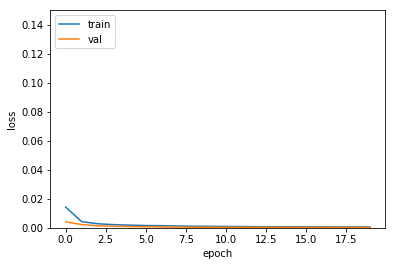

Train Score:  0.00027675878984449113
Validataion Score:  0.0002700114973450605
Test Score:  0.000281709361568851


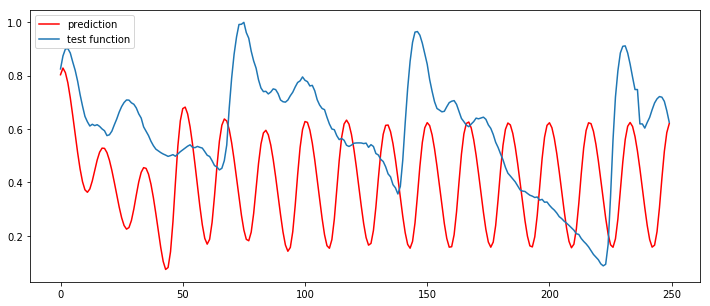

In [0]:
## LSTM model ##
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 100

# make datasets
signal_data = realBP3.values
signal_data = signal_data[:20000, 1]
print(signal_data)
signal_data = signal_data.reshape(20000, 1)
print(signal_data.shape)

# data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# split the data
train = signal_data[0:10000]
val = signal_data[10000:14000]
test = signal_data[14000:20000]

# make datasets
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# make LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# evaluate the model
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# train the model
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16788808920521812810, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13464408910407664546
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2760837259658396686
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18441025002672959412
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.11-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 40, 32)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_5 (LSTM)                (1, 40, 32)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (1, 40, 32)               0         
_________________________________________________________________
lstm_6 (LSTM)                (1, 32)                   8320      
_________________________________________________________________
dropout_6 (Dropout)          (1, 32)                   0         
_________________________________________________________________
dense_2 (Dense)              (1, 1)                   

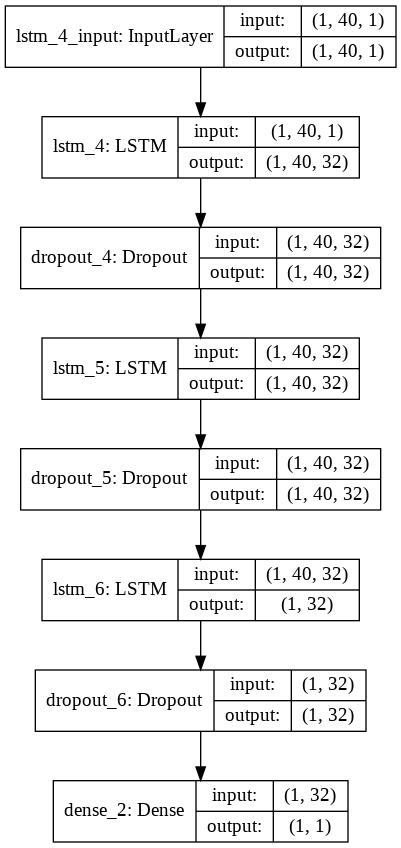

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
# custom_hist = CustomHistory()
# custom_hist.init()

# for i in range(200):
#     model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
#     model.reset_states()

# # 5. 학습과정 살펴보기
# plt.plot(custom_hist.train_loss)
# plt.plot(custom_hist.val_loss)
# plt.ylim(0.0, 0.15)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

# # 6. 모델 평가하기
# trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
# model.reset_states()
# print('Train Score: ', trainScore)
# valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
# model.reset_states()
# print('Validataion Score: ', valScore)
# testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
# model.reset_states()
# print('Test Score: ', testScore)

# # 7. 모델 사용하기
# look_ahead = 250
# xhat = x_test[0]
# predictions = np.zeros((look_ahead,1))
# for i in range(look_ahead):
#     prediction = model.predict(np.array([xhat]), batch_size=1)
#     predictions[i] = prediction
#     xhat = np.vstack([xhat[1:],prediction])
    
# plt.figure(figsize=(12,5))
# plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
# plt.legend()
# plt.show()

model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

* Wavelet Transform with BP data

In [0]:
import pywt
import numpy as np
x = [1, 2, 1, 5, -1, 8, 4, 6]
x = np.array(x)
print(x.shape)
print(x)
for mode_name in ['zero', 'constant', 'symmetric', 'reflect', 'periodic', 'smooth', 'periodization']:
     mode = getattr(pywt.Modes, mode_name)
     cA, cD = pywt.dwt(x, 'db2', mode)
     print("Mode: %d (%s)" % (mode, mode_name))

(8,)
[ 1  2  1  5 -1  8  4  6]
Mode: 0 (zero)
Mode: 2 (constant)
Mode: 1 (symmetric)
Mode: 6 (reflect)
Mode: 4 (periodic)
Mode: 3 (smooth)
Mode: 5 (periodization)


* Plot coefficients (the result of wavelet transform)

[2.78446143 2.76709424 2.74487061 ... 2.76387402 2.77889209 2.78269287]
(20000,)
(10000,)
[3.92554266 3.8712325  3.81199574 3.74743945 3.68015865 3.63163414
 3.60854821 3.5986753  3.59040753 3.58590974 3.58167297 3.57829522
 3.56155426 3.55593642 3.53794525 3.51338434 3.50093608 3.4762633
 3.46377741 3.43135961 3.40797467 3.373709   3.35138783 3.33869685
 3.44403229 3.90889492 4.30785782 4.44738435 4.41683237 4.29522312
 4.12423103 3.97865784 3.90882034 3.95816555 4.01406221 3.97949787
 3.9199811  3.91843188 3.95807233 3.99929928 3.99928064 3.96857984
 3.89788401 3.80481004 3.71983673 3.65462754 3.60606608 3.58706673
 3.57402116 3.57588733 3.5711841  3.56859011 3.56381231 3.55317463
 3.53434308 3.51689329 3.49431075 3.47518055 3.44505842 3.43078094
 3.38220118 3.35640836 3.32652826 3.29756313 3.35172378 3.73179989
 4.21918912 4.43038203 4.43297602 4.34201163 4.15885095 4.02386019
 3.95531054 3.9638956  4.05155647 4.09970741 4.05112731 3.9544705
 3.92651286 3.94444809 3.9683934  3.99060

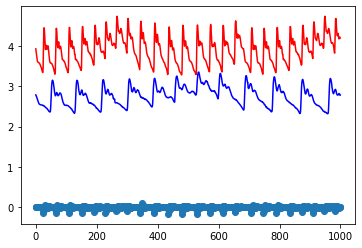

In [0]:
import keras
import pywt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

signal_data = realBP3.values
signal_data = signal_data[0:20000, 1]
plt.plot(signal_data[:1000],'b',label="prediction")
print(signal_data)
print(signal_data.shape)
cA, cD = pywt.dwt(signal_data, 'db1')
print(cA.shape)
cA = cA[:1000]
print(cA)
plt.plot(cA[:1000],'r',label="prediction")
print(cD)
plt.plot(cD[:1000],'o',label="prediction")


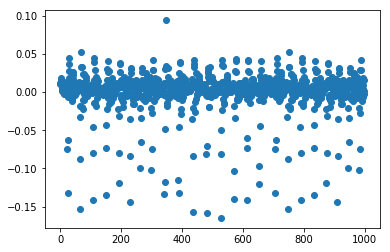

In [0]:
plt.plot(cD[:1000],'o',label="prediction")

## Envelope Extraction (the sifting algorithm of EMD (Empirical Mode Decomposition)

<class 'numpy.ndarray'>


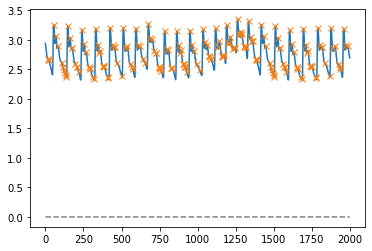

In [0]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

signal_data = realBP3.values
signal_data = signal_data[0:20000, 1]
x = signal_data[2000:4000]
print(type(x))
peaks, _ = find_peaks(x, height=0)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [0]:
!pip install obspy

* Detect peaks and troughs of BP data to extract upper and lower envelope

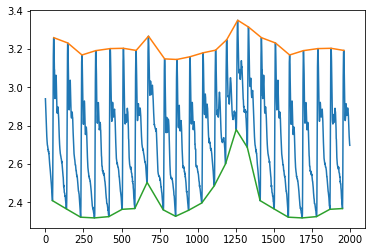

[  55  147  240  331  426  512  596  677  783  863  949 1035 1118 1191
 1263 1334 1419 1511 1604 1695 1790 1876 1960]
23
55
<class 'numpy.ndarray'>
[  46  138  231  322  416  504  587  668  774  855  940 1027 1109 1183
 1253 1326 1410 1502 1595 1686 1780 1868 1951]
23
46
2.416294922


In [0]:
peaks, _ = find_peaks(x, distance=70)
troughs, _ = find_peaks(-x, distance=70)
i = 1
interval = troughs[i] - peaks[i - 1]
i = i + 1  
plt.plot(x)
plt.plot(peaks, x[peaks])
plt.plot(troughs, x[troughs])
plt.show()
print(peaks)
print(len(peaks))
print(peaks[0])
print(type(peaks))
print(troughs)
print(len(troughs))
print(troughs[0])

interval = x

print(x[45])

In [0]:
signal_data = realBP3.values
data = []
for i in range(len(peaks)-1):
  start = peaks[i]
  end = peaks[i+1]
  if i == 0:
    dataset = signal_data[0:start]
  else:
    dataset =  signal_data[start:end]
  data.append(dataset)
data = np.array(data)
print(data)
print(data.shape)

[array([[ 0.        ,  2.78446143],
       [ 1.        ,  2.76709424],
       [ 2.        ,  2.74487061],
       [ 3.        ,  2.72987891],
       [ 4.        ,  2.70588721],
       [ 5.        ,  2.68508887],
       [ 6.        ,  2.66252197],
       [ 7.        ,  2.63715771],
       [ 8.        ,  2.61379932],
       [ 9.        ,  2.59073096],
       [10.        ,  2.57423486],
       [11.        ,  2.56167139],
       [12.        ,  2.55446631],
       [13.        ,  2.5487915 ],
       [14.        ,  2.54572998],
       [15.        ,  2.54356543],
       [16.        ,  2.54158594],
       [17.        ,  2.53601709],
       [18.        ,  2.53651855],
       [19.        ,  2.53472363],
       [20.        ,  2.5348291 ],
       [21.        ,  2.53042139],
       [22.        ,  2.53068555],
       [23.        ,  2.52978809],
       [24.        ,  2.51669678],
       [25.        ,  2.52010156],
       [26.        ,  2.5140835 ],
       [27.        ,  2.51477002],
       [28.        

## Train the adaptive filter for BP data 

(2000, 1)
(2000,)
(2000, 1)
(2000,)
(500,)
[3.14288818 3.12628662 3.09318896 3.04734277 2.97779541 2.90370801
 2.86870996 2.8218877  2.79858203 2.79507178 2.78923877 2.81655615
 2.84933691 2.8804292  2.89154053 2.90632129 2.88100977 2.84814941
 2.81286084 2.77960498 2.78060791 2.77231982 2.78174268 2.79654932
 2.80449414 2.80766162 2.81697852 2.82658545 2.80779346 2.80074609
 2.78504199 2.75505859 2.73679395 2.7094502  2.67566602 2.66019971
 2.63942773 2.61707227 2.59305371 2.58774853 2.59067822 2.57975147
 2.57882764 2.58524121 2.57721777 2.58439648 2.58231152 2.57489502
 2.5626748  2.55731641 2.55926953 2.5560498  2.54773584 2.54865967
 2.5332456  2.5342749  2.52722803 2.52427148 2.51395166 2.50228565
 2.48990723 2.48072217 2.46433154 2.45263916 2.45715234 2.44751855
 2.4430581  2.43455908 2.42732715 2.41460547 2.40214795 2.39573389
 2.38966357 2.37475098 2.36926123 2.36482715 2.35777978 2.35883545
 2.370396   2.43598437 2.59748779 2.79742041 2.96029639 3.07294482
 3.14032812 3.16004

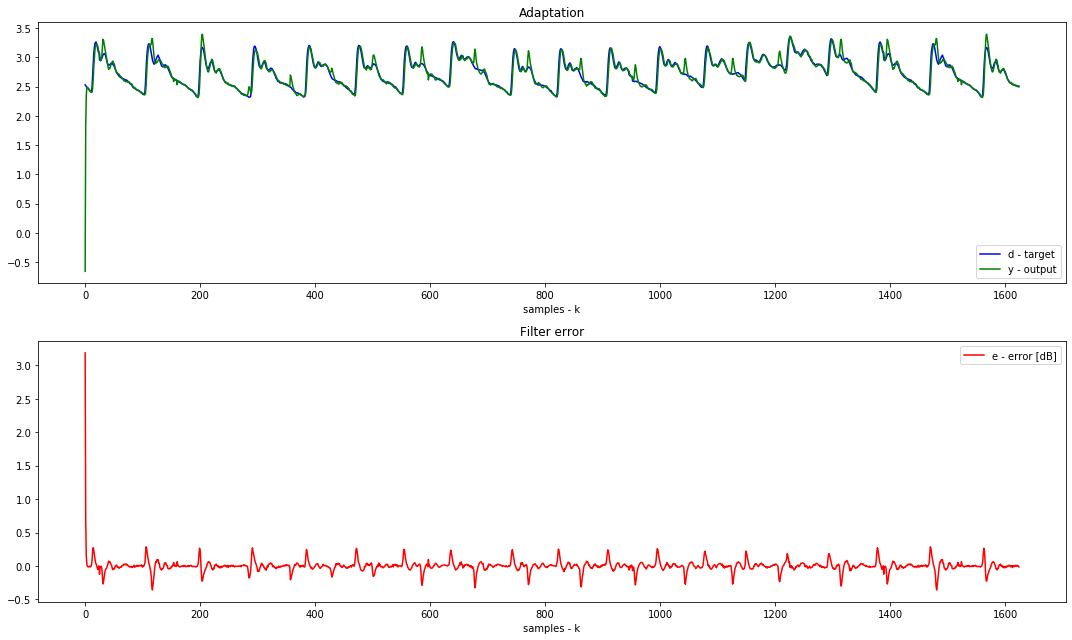

In [0]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

# creation of data
N = 2000
signal_data = realBP3.values
x1 = np.random.normal(2, 4, (N, 1)) # input matrix
x2 = signal_data[100:2100, 1]
print(x1.shape)
print(x2.shape)
x2 = x2.reshape(N, 1)
print(x2.shape)
v = np.random.normal(0, 0.01, N) # noise
p = signal_data[3400:5400, 1]
print(p.shape)
print(d.shape)
print(x)

# identification
f = pa.filters.AdaptiveFilter(model="NLMS", n=1, mu=0.9, w="random")
y, e, w = f.run(p, x2)

## show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(p[:1625],"b", label="d - target")
plt.plot(y[:1625],"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e[:1625],"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

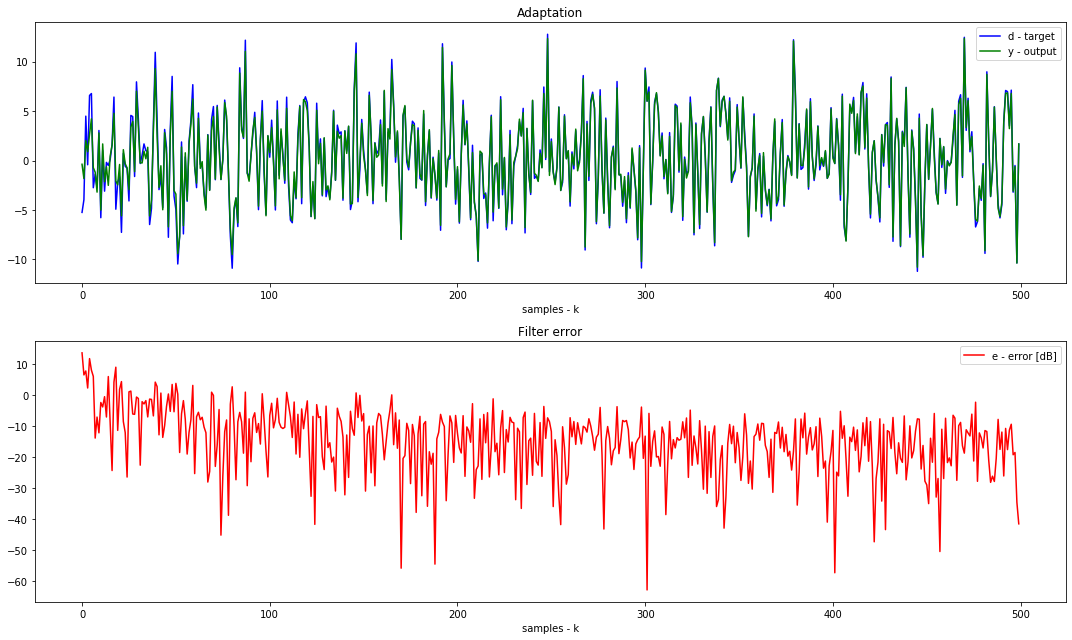

In [0]:
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

# identification
f = pa.filters.FilterLMF(n=4, mu=0.01, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [0]:
!pip install padasip

  Created wheel for padasip: filename=padasip-1.1.1-cp36-none-any.whl size=52973 sha256=eb40bcb9ab9e17f8b5cd189ff4931a41e70f53a2c39bb14ad8eb7bf57349f4c2
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip


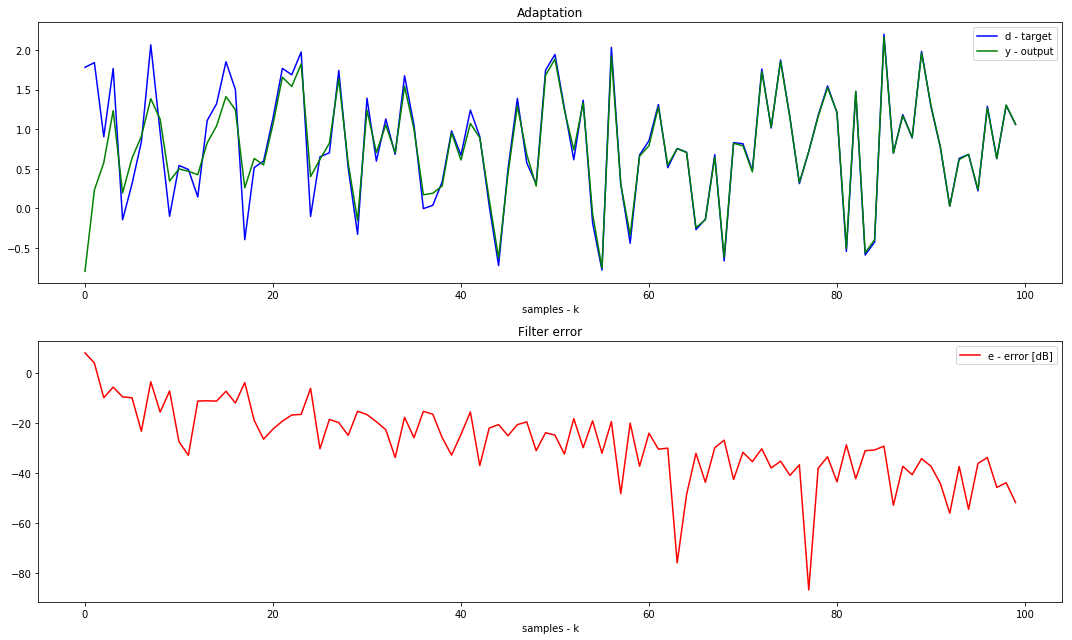

In [0]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa 

# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x
    
def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d
    
N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterNLMS(3, mu=1.)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass    
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y
    
### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()

In [0]:
!pip install tftb
!pip install padasip

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for padasip: filename=padasip-1.1.1-cp36-none-any.whl size=52973 sha256=a08c9b39cc65cad6d3a090a4ad470cb2664e0050f452f399f36bb83cb8f68680
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip


In [0]:
!pip install pyhht

## Empirical Mode Decomposition (EMD) of BP data

2
3
4
5
6


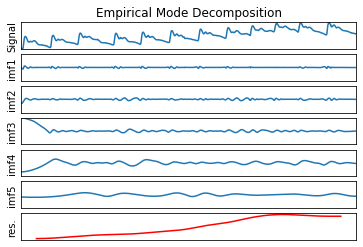

[[-6.10719484e-02 -8.07272506e-02 -9.85145949e-02 ... -2.59291072e-03
   3.98040298e-03 -1.36673182e-02]
 [-5.70236235e-01 -5.60137114e-01 -5.39510793e-01 ... -1.37712067e-02
  -1.85589415e-02 -2.07989970e-02]
 [ 1.76015901e+00  1.75702417e+00  1.75324665e+00 ...  1.37331951e-03
   2.73332491e-03  3.85042329e-03]
 [-1.20897174e+00 -1.20588627e+00 -1.20248129e+00 ... -7.08334408e-02
  -7.15698450e-02 -7.16322747e-02]
 [-3.07072377e-01 -3.08631860e-01 -3.10159223e-01 ... -2.03842214e-01
  -2.04737662e-01 -2.05378221e-01]
 [ 2.78176604e+00  2.78184370e+00  2.78193199e+00 ...  3.69123769e+00
   3.69135826e+00  3.69148332e+00]]
(6, 1000)


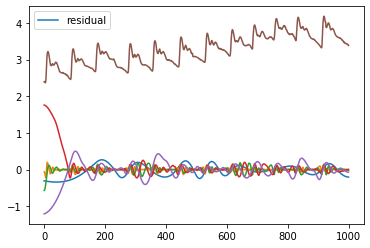

In [0]:
from pyhht.visualization import plot_imfs
import matplotlib.pyplot as plt
import numpy as np
from pyhht import EMD
signal_data = realBP3.values
signal_data = signal_data[2500:3500, 1]
signal_data = signal_data[0:1000]
t = np.linspace(0, 1, 1000)
modes = signal_data
x = modes + t
decomposer = EMD(x)
imfs = decomposer.decompose()
plot_imfs(x, imfs, t) 
print(imfs)
print(imfs.shape)

plt.plot(imfs[4], label="residual")
plt.plot(imfs[0])
plt.plot(imfs[1])
plt.plot(imfs[2])
plt.plot(imfs[3])
plt.legend()
plt.plot(x)

In [0]:
!pip install pyhht

* Research about improving efficiency of sifting algorithm

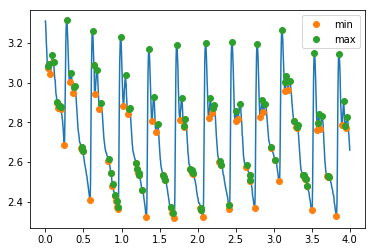

In [0]:
from numpy import *

data = signal_data

a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max

from pylab import *
plot(x, data)
plot(x[b], data[b], "o", label="min")
plot(x[c], data[c], "o", label="max")
legend()
show()

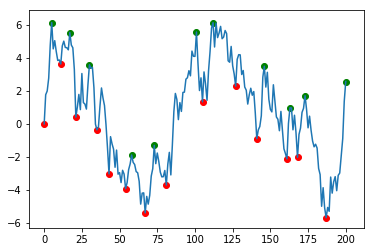

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample
np.random.seed(0)
rs = np.random.randn(200)
xs = [0]
for r in rs:
    xs.append(xs[-1]*0.9 + r)
df = pd.DataFrame(xs, columns=['data'])

n=5 # number of points to be checked before and after 
# Find local peaks
df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal, order=n)[0]]['data']

# Plot results
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['data'])
plt.show()

In [0]:
!pip install padasip

  Created wheel for padasip: filename=padasip-1.1.1-cp36-none-any.whl size=52973 sha256=2af7d40dd101d42e547a11ab07d1c9bcc111717501a993e1e3b6eab265c1da7b
  Stored in directory: /root/.cache/pip/wheels/64/33/7b/3fe5f0377cb1d58f8f565dc0e718ae80767f8f563e6a77f1ac
Successfully built padasip


In [0]:
signal_data = realBP3.values
signal_data = signal_data[:10000, 1]
print(signal_data)

[2.78446143 2.76709424 2.74487061 ... 2.68656689 2.67925586 2.65439258]


* Plot cap(capacitance) data

In [0]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/CS/1_1030.mat')
for i in mat.keys():
  print(i)
  print(np.shape(mat[i]))

__header__
()
__version__
()
__globals__
(0,)
Data
(110600, 9)
Data_2018_10_30
(110600, 9)
accel
(1, 1)
ans
(6, 1)
cap
(1, 1)
cs
(1, 1)
gyro
(1, 1)


In [0]:
arr0 = arr[:5000, 0]
arr1 = arr[:5000, 1]
arr2 = arr[:5000, 2]
arr3 = arr[:5000, 3]
arr4 = arr[:5000, 4]
arr5 = arr[:5000, 5]
arr6 = arr[:5000, 6]
arr7 = arr[:5000, 7]
arr8 = arr[4000:9000, 8]

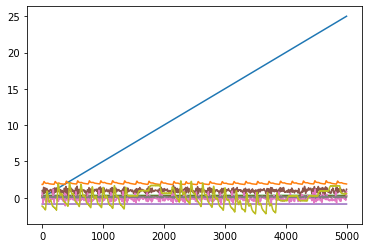

In [0]:
import numpy as np
import matplotlib.pylab as plt

plt.plot(arr0)
plt.plot(arr1)
plt.plot(arr2)
plt.plot(arr3)
plt.plot(arr4)
plt.plot(arr5)
plt.plot(arr6)
plt.plot(arr7)
plt.plot(arr8)

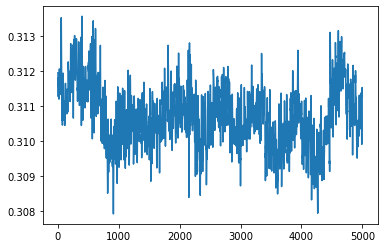

In [0]:
plt.plot(arr2)

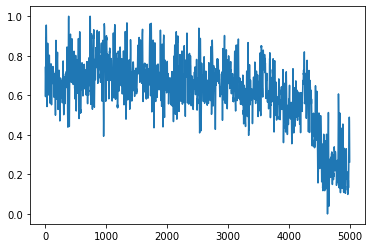

In [0]:
MinMax = minmax_scale(arr3, axis=0, copy=True)
plt.plot(MinMax)

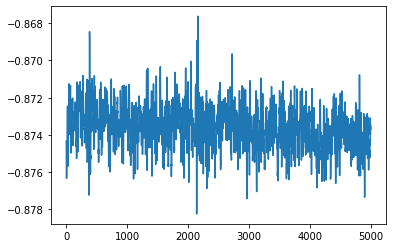

In [0]:
plt.plot(arr4)

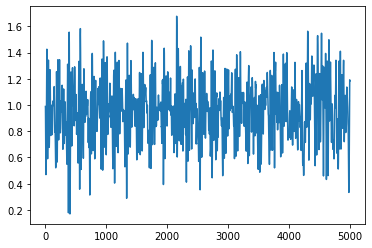

In [0]:
plt.plot(arr5)

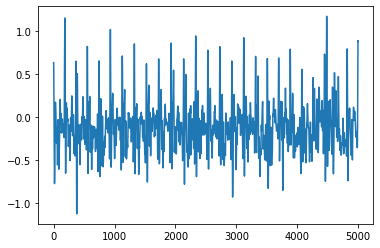

In [0]:
plt.plot(arr6)

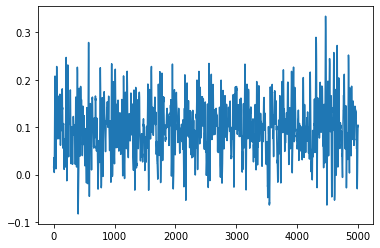

In [0]:
plt.plot(arr7)

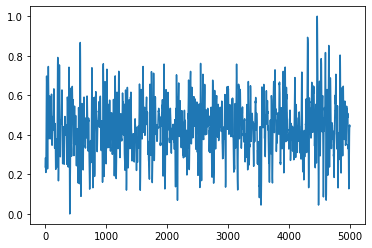

In [0]:
MinMax = minmax_scale(arr7, axis=0, copy=True)
plt.plot(MinMax)